# **`pycoco`** calling **`CoCo`**

___

## Introduction

---
**`pycoco.coco_calls`**

In [1]:
try:
    from importlib import reload
except:
    pass

# %matplotlib inline
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test

In [2]:
snname = "SN2006aj"
pcc.coco.run_LCfit(snname)

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on SN2006aj
callargs are  ['/Users/berto/Code/CoCo/lcfit', 'SN2006aj']
Fit complete


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/utils.py:216: UserWarning: /Users/berto/Code/verbose-enigma/notebooks/Tutorials/SN2006aj is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")


Then run

In [ ]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

In [ ]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

In [ ]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model="Karpenka12")

In [ ]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## Model Choice
----
You can also pass a model to **`CoCo lcfit`**, this is possible through **`pycoco`** using the `model` arg. This will only take models that are defined in CoCo/src/models and match the filenames. So, currently the valid models are:

In [ ]:
models = np.unique([i.split(".")[0] for i in os.listdir(os.path.join(pcc.defaults._default_coco_dir_path, "src/models"))])
models

In [ ]:
model_name = "Karpenka12"
# model_name = "Karpenka12Afterglow"
# model_name = "Kessler10"
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model=model_name, verbose=True)

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


<IPython.core.display.Javascript object>


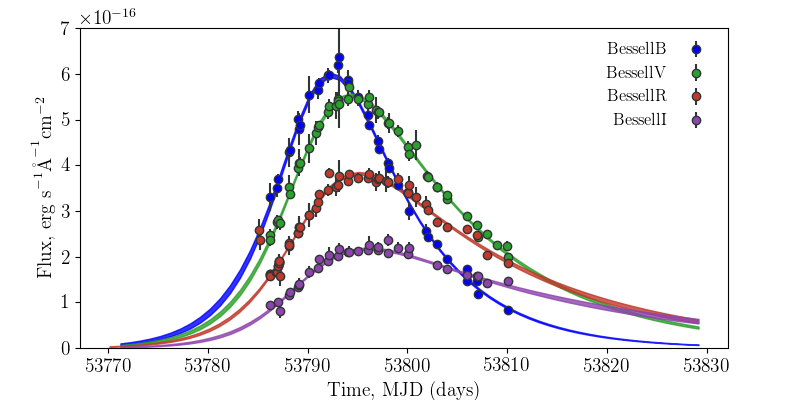

In [5]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

In [ ]:
pcc.coco.run_LCfit_fileinput(os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list"))
print("Done.")

## Call Specfit
---

### individual speclists

In [3]:
pcc.coco.get_all_spec_lists()

['/Users/berto/Code/CoCo/lists/iPTF13bvn.list',
 '/Users/berto/Code/CoCo/lists/SN1993J.list',
 '/Users/berto/Code/CoCo/lists/SN1994I.list',
 '/Users/berto/Code/CoCo/lists/SN1996cb.list',
 '/Users/berto/Code/CoCo/lists/SN1998bw.list',
 '/Users/berto/Code/CoCo/lists/SN1999dn.list',
 '/Users/berto/Code/CoCo/lists/SN2002ap.list',
 '/Users/berto/Code/CoCo/lists/SN2003jd.list',
 '/Users/berto/Code/CoCo/lists/SN2004aw.list',
 '/Users/berto/Code/CoCo/lists/SN2005bf.list',
 '/Users/berto/Code/CoCo/lists/SN2005hg.list',
 '/Users/berto/Code/CoCo/lists/SN2006aj.list',
 '/Users/berto/Code/CoCo/lists/SN2007C.list',
 '/Users/berto/Code/CoCo/lists/SN2007gr.list',
 '/Users/berto/Code/CoCo/lists/SN2007uy.list',
 '/Users/berto/Code/CoCo/lists/SN2007Y.list',
 '/Users/berto/Code/CoCo/lists/SN2008ax.list',
 '/Users/berto/Code/CoCo/lists/SN2008bo.list',
 '/Users/berto/Code/CoCo/lists/SN2008D.list',
 '/Users/berto/Code/CoCo/lists/SN2009bb.list',
 '/Users/berto/Code/CoCo/lists/SN2009er.list',
 '/Users/berto/Co

In [6]:
sn.load_list(path=os.path.join(pcc.defaults._default_list_dir_path, sn.name+".list"))
sn.load_spec()

# sn.load_mangledspec()
sn.load_reconspec()
sn.load_simspec()


In [7]:
path_to_filter = os.path.join(pcc.defaults._default_filter_dir_path,"BessellB.dat")
BessellB = pcc.classes.FilterClass()
BessellB.read_filter_file(path_to_filter)
BessellB.calculate_AB_zp()

sim_spec_flux = []
sim_mjd_obs = []

for spec in sn.sim_spec:
    print(spec)
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=BessellB, spectrum_object=sn.sim_spec[spec])
    mjd_obs = float(spec.split("_")[-1])
    
    sim_spec_flux.append(flux)
    sim_mjd_obs.append(mjd_obs)

SN2006aj_53786.270000
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  3540.3
max wavelength =  7272.03
Filter_area =  958.900271264
Integrated flux =  65.3955444183
SN2006aj_53787.230000
filter =  BessellB
min wavelength =  3540.3
max wavelength =  7272.03
resampling the response
min wavelength =  4263.57
max wavelength =  9633.22
Filter_area =  583.176851915
Integrated flux =  41.0293180765
SN2006aj_53788.200000
filter =  BessellB
min wavelength =  4263.57
max wavelength =  9633.22
resampling the response
min wavelength =  3386.88
max wavelength =  9676.79
Filter_area =  958.901772145
Integrated flux =  91.3099937273
SN2006aj_53789.170000
filter =  BessellB
min wavelength =  3386.88
max wavelength =  9676.79
resampling the response
min wavelength =  3388.16
max wavelength =  9341.84
Filter_area =  958.904587177
Integrated flux =  103.198988325
SN2006aj_53790.140000
filter =  BessellB
min wavelength =  3388.16

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


<IPython.core.display.Javascript object>


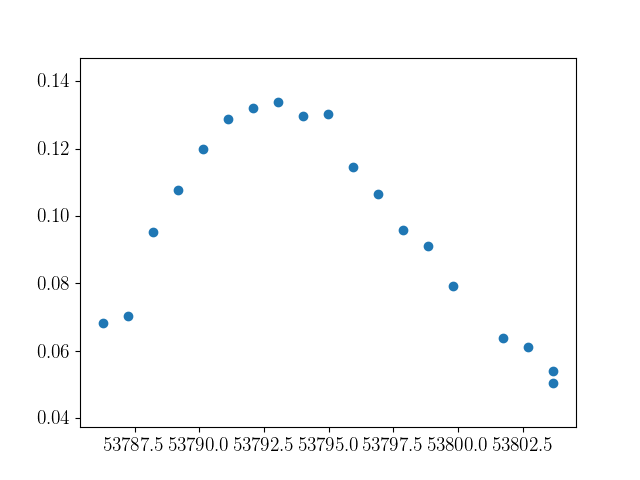

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sim_mjd_obs, sim_spec_flux)


In [11]:
# pcc.coco.run_specfit('/Users/berto/Code/CoCo/lists/SN2013ge.list')
pcc.coco.run_specfit(SNObject=sn, overwrite=True)

hasattr spec and lcfit
2006aj_-7.93.txt <pycoco.classes.SpectrumClass object at 0x1123cecc0>
filter =  BessellB
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  958.621239806
Integrated flux =  2.38852505349e-14
filter =  BessellB
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  958.621239806
Integrated flux =  2.38852505349e-14
filter =  BessellI
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  218.735521069
Integrated flux =  1.45120651752e-15
filter =  BessellI
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  218.735521069
Integrated flux =  1.45120651752e-15
filter =  BessellR
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  1423.6721297
Integrated flux =  1.47359725284e-14
filter =  BessellR
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  1423.6721297
Integrated flux =  1.47359725284e-14
filter =  BessellV
min wavelength =  3658.54602
max wavel

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


BessellB
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  446.152651594
Integrated flux =  1.26634040847e-14
filter =  BessellB
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  446.152651594
Integrated flux =  1.26634040847e-14
filter =  BessellI
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1441.3680877
Integrated flux =  1.54851752597e-14
filter =  BessellI
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1441.3680877
Integrated flux =  1.54851752597e-14
filter =  BessellR
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1583.64821019
Integrated flux =  2.84183565257e-14
filter =  BessellR
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1583.64821019
Integrated flux =  2.84183565257e-14
filter =  BessellV
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  893.740699145
Integrated flux =  2.33124971209e-14
filter =  B

SN2006aj_53789.170000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53789.170000.spec
2006aj_-4.06.txt <pycoco.classes.SpectrumClass object at 0x11189a550>
filter =  BessellB
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  958.899970444
Integrated flux =  1.98601734065e-14
filter =  BessellB
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  958.899970444
Integrated flux =  1.98601734065e-14
filter =  BessellI
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  135.403493221
Integrated flux =  1.05152553074e-15
filter =  BessellI
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  135.403493221
Integrated flux =  1.05152553074e-15
filter =  BessellR
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  1388.46763606
Integrated flux =  1.48879920092e-14
filter =  BessellR
min wavelength =  3496.00253


SN2006aj_53792.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53792.070000.spec
2006aj_-1.16.txt <pycoco.classes.SpectrumClass object at 0x1124aa7b8>
filter =  BessellB
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  958.84538574
Integrated flux =  2.05098585274e-14
filter =  BessellB
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  958.84538574
Integrated flux =  2.05098585274e-14
filter =  BessellI
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  1441.60069518
Integrated flux =  8.45531834388e-15
filter =  BessellI
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  1441.60069518
Integrated flux =  8.45531834388e-15
filter =  BessellR
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  1583.9453729
Integrated flux =  2.0664695532e-14
filter =  BessellR
min wavelength =  3521.21749
max 

2006aj_1.74.txt <pycoco.classes.SpectrumClass object at 0x1124aaeb8>
filter =  BessellB
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  958.835595727
Integrated flux =  1.97185119209e-14
filter =  BessellB
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  958.835595727
Integrated flux =  1.97185119209e-14
filter =  BessellI
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1441.16389984
Integrated flux =  1.61874925715e-14
filter =  BessellI
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1441.16389984
Integrated flux =  1.61874925715e-14
filter =  BessellR
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1583.91644137
Integrated flux =  2.78836380958e-14
filter =  BessellR
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1583.91644137
Integrated flux =  2.78836380958e-14
filter =  BessellV
min wavelength =  3500.55983
max wavelength =  9668.23

SN2006aj_53797.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53797.880000.spec
2006aj_4.64.txt <pycoco.classes.SpectrumClass object at 0x112171f28>
filter =  BessellB
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  958.848690632
Integrated flux =  1.04053698945e-14
filter =  BessellB
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  958.848690632
Integrated flux =  1.04053698945e-14
filter =  BessellI
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  1269.36781531
Integrated flux =  1.41201644427e-14
filter =  BessellI
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  1269.36781531
Integrated flux =  1.41201644427e-14
filter =  BessellR
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  1583.32153347
Integrated flux =  3.10554495306e-14
filter =  BessellR
min wavelength =  3500.28081
m

SN2006aj_53801.750000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53801.750000.spec
2006aj_8.52.txt <pycoco.classes.SpectrumClass object at 0x1120c4eb8>
filter =  BessellB
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  958.871298971
Integrated flux =  7.87805026587e-15
filter =  BessellB
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  958.871298971
Integrated flux =  7.87805026587e-15
filter =  BessellI
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  1441.37419464
Integrated flux =  1.62840077668e-14
filter =  BessellI
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  1441.37419464
Integrated flux =  1.62840077668e-14
filter =  BessellR
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  1583.62180411
Integrated flux =  3.19902663469e-14
filter =  BessellR
min wavelength =  3521.8892
max wav

SN2006aj_53803.680001.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53803.680001.spec


In [13]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.load_list(path=os.path.join(pcc.defaults._default_list_dir_path, sn.name+".list"))
sn.load_spec()

sn.load_reconspec()
sn.load_simspec()

path_to_filter = os.path.join(pcc.defaults._default_filter_dir_path,"BessellB.dat")
BessellB = pcc.classes.FilterClass()
BessellB.read_filter_file(path_to_filter)
BessellB.calculate_AB_zp()

sim_spec_flux = []
sim_mjd_obs = []

for spec in sn.sim_spec:
    print(spec)
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=BessellB, spectrum_object=sn.recon_spec[spec])
    mjd_obs = float(spec.split("_")[-1])
    
    sim_spec_flux.append(flux)
    sim_mjd_obs.append(mjd_obs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sim_mjd_obs, sim_spec_flux)

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


SN2006aj_53786.270000


AttributeError: 'SNClass' object has no attribute 'recon_spec'

## All Speclists
___

In [ ]:
pcc.coco.specfit_all()

# Specphase

In [ ]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Foo")

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Bazin09")